# МИНОБРНАУКИ РОССИИ федеральное государственное бюджетное образовательное учреждение высшего образования "Череповецкий государственный университет"

**Институт:** Информационных технологий
**Кафедра:** Математики и информатики
**Студент группы:** 1ПМБ-02-1оп-21
**Направление подготовки**: 01.04.02 Прикладная математика и информатика
**ФИО:** Тимофеенко Никита Вячеславович
**Руководитель:** Мухин Владимир Васильевич
**Должность:** профессор
**Дата предстваления работы:** <<19>> декабря 2023 г.

## Цели работы:

1. **Повторение и анализ поисковых алгоритмов минимизации функции нескольких переменных**: Освежить и углубить понимание различных алгоритмов поиска минимума функции нескольких переменных.

2. **Реализация алгоритмов с помощью пакетов прикладных программ**: Изучить и освоить практическое применение данных алгоритмов, используя современные инструменты и пакеты прикладного ПО.

## Постановка задачи

1. **Пусть** дана функция $ \large f(x)$, ограниченная снизу на $ \large \mathbb{R^n}$ и имеющая непрерывные частные производные во всех его точках.
2. **Требуется** найти локальный минимум функции $ \large f(x)$ на множестве допустимых решений  $ \large X = \mathbb{R^n}$, т. е. найти такую точку $ \large x^* ∈ \mathbb{R^n}$, что $ \large f(x^*) = \min_{x \in \mathbb{R^n}} f(x)$

## Требования к работе

1. **Нахождение минимума заданной функции методом наискорейшего градиентного спуска**:

- Функция, минимум которой необходимо найти, определена следующим образом:

$$\large f(x) = - x_1^2 \cdot e^{(1 - x_1^2 - 20.25 \cdot (x_1 - x_2)^2)}$$


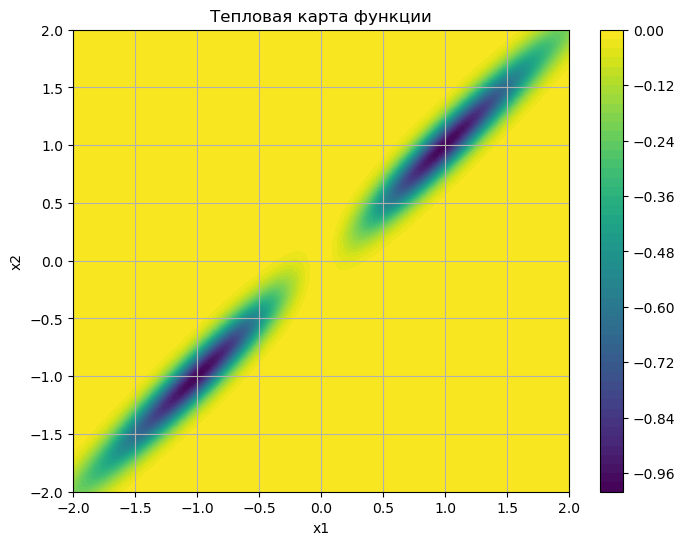

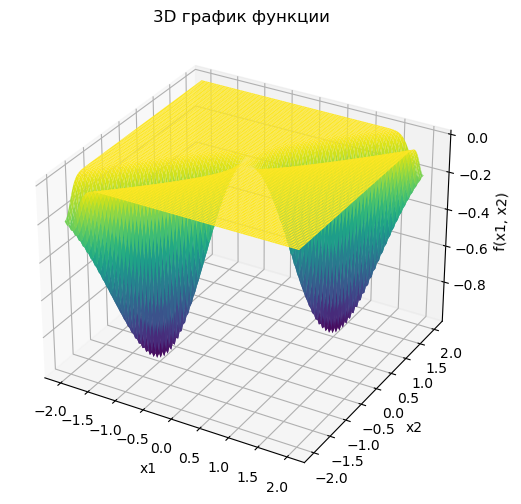

In [17]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt



class Function:
    """
    Класс Function для анализа и визуализации поведения заданной функции.
    """

    def __init__(self):
        """
        Инициализирует экземпляр класса Function.
        Создаёт символьную переменную и определяет две части функции:
        одна для положительных значений x и другая для отрицательных.
        """
        self.x1 = sp.symbols('x1')
        self.x2 = sp.symbols('x2')
        self.f_sym = - self.x1 ** 2 * sp.exp(1 - self.x1 ** 2 - 20.25 * (self.x1 - self.x2) ** 2)

    @staticmethod
    def f(x1, x2):
        """
        Определение функции для последующей оптимизации.

        :param x1: Первая переменная.
        :param x2: Вторая переменная.
        :return: Значение функции в точке (x1, x2).
        """
        return - x1 ** 2 * np.exp(1 - x1 ** 2 - 20.25 * (x1 - x2) ** 2)

    def _hessian(self):
        """
        Вычисляет матрицу Гессе для функции.
        :return: Матрица Гессе в символьной форме.
        """
        return sp.hessian(self.f_sym, (self.x1, self.x2))

    def critical_points(self):
        """
        Находит стационарные точки функции.
        Стационарные точки - это точки, в которых все частные производные функции равны нулю.
        Они могут быть точками локальных максимумов, минимумов или седловыми точками.

        :return: Список стационарных точек функции.
        """
        df_dx1 = sp.diff(self.f_sym, self.x1)
        df_dx2 = sp.diff(self.f_sym, self.x2)
        critical_pts = sp.solve([df_dx1, df_dx2], (self.x1, self.x2))

        # Проверка точки (0.0, 0.0)
        if sp.simplify(df_dx1.subs({self.x1: 0, self.x2: 0})) == 0 and sp.simplify(df_dx2.subs({self.x1: 0, self.x2: 0})) == 0:
            critical_pts.append((0.0, 0.0))

        return critical_pts


    def eigenvalues_hessian(self, point):
        """
        Вычисляет собственные значения матрицы Гессе в заданной точке.
        :param point: Точка для анализа (x1, x2).
        :return: Собственные значения матрицы Гессе в этой точке.
        """
        hessian_matrix = self._hessian()
        hessian_in_point = hessian_matrix.subs({self.x1: point[0], self.x2: point[1]})
        return hessian_in_point.eigenvals()

    def plot_heatmap(self, x1_range, x2_range, resolution=100):
        """
        Визуализирует исправленную тепловую карту функции с корректным отображением значений.

        :param x1_range: кортеж (min, max) для значений x1.
        :param x2_range: кортеж (min, max) для значений x2.
        :param resolution: разрешение сетки для вычислений.
        """
        x1 = np.linspace(x1_range[0], x1_range[1], resolution)
        x2 = np.linspace(x2_range[0], x2_range[1], resolution)
        X1, X2 = np.meshgrid(x1, x2)
        Z = self.f(X1, X2)

        plt.figure(figsize=(8, 6))
        cp = plt.contourf(X1, X2, Z, levels=50, cmap='viridis')
        plt.grid(True)
        plt.colorbar(cp)
        plt.title('Тепловая карта функции')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.show()

    def plot_3d(self, x1_range, x2_range, resolution=100):
        """
        Визуализирует 3D график функции.

        :param x1_range: кортеж (min, max) для значений x1.
        :param x2_range: кортеж (min, max) для значений x2.
        :param resolution: разрешение сетки для вычислений.
        """
        x1 = np.linspace(x1_range[0], x1_range[1], resolution)
        x2 = np.linspace(x2_range[0], x2_range[1], resolution)
        X1, X2 = np.meshgrid(x1, x2)
        Z = self.f(X1, X2)

        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
        ax.set_title('3D график функции')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('f(x1, x2)')
        plt.show()

# Создание экземпляра класса и вызов метода визуализации
func = Function()
func.plot_heatmap(x1_range=(-2, 2), x2_range=(-2, 2))
func.plot_3d(x1_range=(-2, 2), x2_range=(-2, 2))

In [12]:
f = Function()
print(f'Стационарные(критические) точки: {f.critical_points()}')
print(f'Собственные значения матрицы Гессе в точке {f.critical_points()[0]}: {f.eigenvalues_hessian(f.critical_points()[0])}')
print(f'Собственные значения матрицы Гессе в точке {f.critical_points()[1]}: {f.eigenvalues_hessian(f.critical_points()[1])}')
print(f'Собственные значения матрицы Гессе в точке {f.critical_points()[2]}: {f.eigenvalues_hessian(f.critical_points()[2])}')
print(f'Собственные значения матрицы Гессе в точке {f.critical_points()[3]}: {f.eigenvalues_hessian(f.critical_points()[3])}')

Стационарные(критические) точки: [(-1.00000000000000, -1.00000000000000), (0.0, x2), (1.00000000000000, 1.00000000000000), (0.0, 0.0)]
Собственные значения матрицы Гессе в точке (-1.00000000000000, -1.00000000000000): {83.0493526458808: 1, 1.95064735411920: 1}
Собственные значения матрицы Гессе в точке (0.0, x2): {-2*E*exp(-20.25*x2**2): 1, 0: 1}
Собственные значения матрицы Гессе в точке (1.00000000000000, 1.00000000000000): {83.0493526458808: 1, 1.95064735411920: 1}
Собственные значения матрицы Гессе в точке (0.0, 0.0): {-2*E: 1, 0: 1}



### Анализ Стационарных Точек и Собственных Значений Матрицы Гессе

1) Для точки **\((-1, -1)\)**
Собственные значения: *\(83.049\)* и *\(1.951\)*.
Оба значения положительные, что указывает на локальный минимум в этой точке.<br><br>

2) Для точки **\((0, 0)\)**
Собственные значения: *\(-2E\)* и *\(0\)*.
Наличие отрицательного и нулевого значения указывает на седловую точку.<br><br>

3) Для точек вида **\((0, x2)\)**, где \(x2\) может быть любым числом
Собственные значения: *$\large -2 \cdot e^{(- 20.25 \cdot (x_2)^2)}$* и *\(0\)*.
Так как одно из значений нулевое, это также седловые точки.<br><br>

4) Для точки **\((1, 1)\)**
Собственные значения: *\(83.049\)* и *\(1.951\)*.
Аналогично первой точке, оба значения положительные, что указывает на локальный минимум.<br>



In [113]:
class Config:
    """
    Класс конфигурации для хранения констант.

    Атрибуты:
    - INITIAL_POINTS: Список начальных точек.
    - EPSILON_1: Пороговое значение для критерия остановки по градиенту.
    - EPSILON_2: Пороговое значение для критерия остановки по изменению значения функции и аргументов.
    - ITERATIONS: Максимальное количество итераций.
    """

    INITIAL_POINTS = [
        [2, 2],
        [-2, -2]
    ]

    EPSILON_1 = 0.001
    EPSILON_2 = 0.001
    ITERATIONS = 200

**Градиент** - вектор частных производных функции, указывает направление наибольшего возрастания функции в точке.
**Седловая точка** — это тип критической точки функции нескольких переменных, в которой функция не является ни максимумом, ни минимумом. В седловой точке функция в некоторых направлениях увеличивается, а в других — уменьшается. Визуально это похоже на форму седла: вдоль одной оси точка является минимумом, а вдоль другой — максимумом.
**Стационарная точка функции** — это точка, в которой первая производная функции равна нулю. В контексте функций нескольких переменных стационарная точка — это точка, где все частные производные функции равны нулю.

# Алгоритм наискорейшего градиентного спуска

![](4.png)

In [133]:
from numpy.linalg import norm
from scipy.optimize import minimize_scalar, approx_fprime
import pandas as pd

class MultiDimensionalOptimizationMethods:
    """
    Класс для реализации различных методов оптимизации одномерных функций.
    Предназначен для поиска минимума функции с использованием различных алгоритмов.
    """
    def __init__(self, function):
        """
        Инициализация класса.
        :param function: Функция, минимум которой необходимо найти.
        """
        self.function = function

    def steepest_gradient_descent(self, initial_points, epsilon1, epsilon2, M):
        """
        Метод наискорейшего спуска (градиентный спуск) для оптимизации функции.
        :param initial_points: Список начальных точек для итераций.
        :param epsilon1: Пороговое значение для критерия остановки по градиенту.
        :param epsilon2: Пороговое значение для критерия остановки по изменению значения функции и аргументов.
        :param M: Максимальное количество итераций.
        :return: DataFrame с данными об итерациях (положение, значение функции, градиент).
        """

        # Создание DataFrame для хранения данных об итерациях
        columns = ['Iteration', 'x1', 'x2', 'Function Value', 'Gradient']
        optimization_data = pd.DataFrame(columns=columns)

        for x0 in initial_points:
            x_k = np.array(x0)
            k = 0

            while True:
                grad_f_x_k = self._gradient(x_k, epsilon1)

                # Создание новой строки данных для текущей итерации
                current_data = pd.DataFrame([{
                    'Iteration': k,
                    'x1': x_k[0],
                    'x2': x_k[1],
                    'Function Value': self.function(x_k[0], x_k[1]),
                    'Gradient': grad_f_x_k
                }])

                # Обновление optimization_data с использованием pandas.concat
                optimization_data = pd.concat([optimization_data, current_data], ignore_index=True)

                if np.linalg.norm(grad_f_x_k) < epsilon1 or k >= M:
                    break

                def phi(t):
                    return self.function(x_k[0] - t * grad_f_x_k[0], x_k[1] - t * grad_f_x_k[1])

                res = minimize_scalar(phi, method='golden')
                t_k_star = res.x

                x_k_next = x_k - t_k_star * grad_f_x_k
                if np.linalg.norm(x_k_next - x_k) < epsilon2 and abs(self.function(x_k_next[0], x_k_next[1]) - self.function(x_k[0], x_k[1])) < epsilon2:
                    break

                x_k = x_k_next
                k += 1

        return optimization_data

    def _gradient(self, x, epsilon):
        """
        Вычисление градиента функции в точке x с использованием метода конечных разностей.
        Формула Конечных Разностей для производной: f'(x) ≈ (f(x + h) - f(x)) / h
        :param x: Точка, в которой вычисляется градиент.
        :param epsilon: Параметр для численного вычисления градиента.
        :return: Градиент функции в точке x.
        """
        def wrapped_func(x):
            """
            Вспомогательная функция для передачи аргумента функции в формате [x1, x2].
            :param x: Точка [x1, x2] для вычисления функции.
            :return: Значение функции в точке [x1, x2].
            """
            return self.function(x[0], x[1])

        return approx_fprime(x, wrapped_func, epsilon)






In [134]:
function = Function().f

# Использование метода со всеми начальными точками
optimization_df = MultiDimensionalOptimizationMethods(function=function).steepest_gradient_descent(
    Config.INITIAL_POINTS,
    Config.EPSILON_1,
    Config.EPSILON_2,
    Config.ITERATIONS)


optimization_df

,Iteration,x1,x2,Function Value,Gradient
0,0,2,2,-0.199148,"[0.6008183483142522, 0.004032711706459136]"
1,1,1.929373,1.999526,-0.221408,"[0.0005420612450846616, 0.6326437620687717]"
2,2,1.929312,1.929253,-0.244652,"[0.6952708990600676, 0.004362102381444891]"
3,3,1.862934,1.928836,-0.268698,"[0.0012877533206447109, 0.7216367687145859]"
4,4,1.862816,1.862699,-0.293492,"[0.7849983323016984, 0.004551697882882401]"
...,...,...,...,...,...
186,97,-1.013566,-1.01653,-0.999456,"[0.0883300756637881, -0.09975807265872871]"
187,98,-1.014641,-1.015315,-0.999564,"[-0.008611708952056379, -0.0070515938735978825]"
188,99,-1.004588,-1.007083,-0.999832,"[0.10497543693445179, -0.08080615619588728]"
189,100,-1.005815,-1.006139,-0.99993,"[0.012150302246439986, 0.00714441585614257]"
